twitterのフォロワー数でジップ則を確認してあ・そ・ぶ

# はじめに

経緯: 


twitterからソーシャルネットワークを構築してグラフアルゴリズムとかグラフニューラルネットワークとかで遊びたかったが、twitter apiにはいろいろな制限があることがわかり、若干、残念な気持ちになったので、気晴らしにZipf則で遊ぶことにしました。


モチベーション：

リンクの統計性から、制限の中で取得した部分的なデータがどれくらい欠損しそうで、どれくらい使えそうか、その感覚を掴むこと

# 分布の確認

ライブラリ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

データ読み込み。データはこちらから入手しました。
  
https://lab.syncer.jp/Document/Twitter/Follower

csvファイルがほしい方はこちらから：
  
https://drive.google.com/open?id=1qQB7vmFwJNYBbeMP6VFs2fkXtOVifqSVNVQHQwvIaLE

In [2]:
# 日本だけの場合
followers_jp_path = './data/top_tweet_user_jp_2019_6 - 日本.csv'
# 世界の場合
followers_all_path = './data/top_tweet_user_jp_2019_6 - 世界.csv'

followers_jp_df = pd.read_csv(followers_jp_path)
followers_all_df = pd.read_csv(followers_all_path)

followers_jp_df['フォロワー数'] = followers_jp_df['フォロワー数'].apply(lambda x: int(x.replace(',', '')))
followers_all_df['フォロワー数'] = followers_all_df['フォロワー数'].apply(lambda x: int(x.replace(',', '')))

lr_jp = LinearRegression()
lr_all = LinearRegression()

In [3]:
followers_jp_df.describe()

,順位,フォロワー数
count,200.000000,2.000000e+02
mean,100.500000,1.610835e+06
std,57.879185,9.272718e+05
min,1.000000,8.704910e+05
25%,50.750000,1.011710e+06
50%,100.500000,1.236162e+06
75%,150.250000,1.870343e+06
max,200.000000,7.100674e+06


In [4]:
followers_all_df.describe()

,順位,フォロワー数
count,200.000000,2.000000e+02
mean,100.500000,2.631971e+07
std,57.879185,1.800354e+07
min,1.000000,1.289630e+07
25%,50.750000,1.509941e+07
50%,100.500000,1.880868e+07
75%,150.250000,2.976816e+07
max,200.000000,1.095016e+08


日本だけの場合

In [9]:
# ついでに線形モデルでフィットする
followers_jp_arr = followers_jp_df['フォロワー数'].to_numpy()
rank_jp_arr = np.arange(followers_jp_arr.shape[0]) + 1

model_jp = lr_jp.fit(np.log(rank_jp_arr).reshape(-1, 1), np.log(followers_jp_arr))
print(model_jp.coef_, model_jp.intercept_)

[-0.45649609] 16.149661459764342


Text(0.5, 0, 'log(rank)')

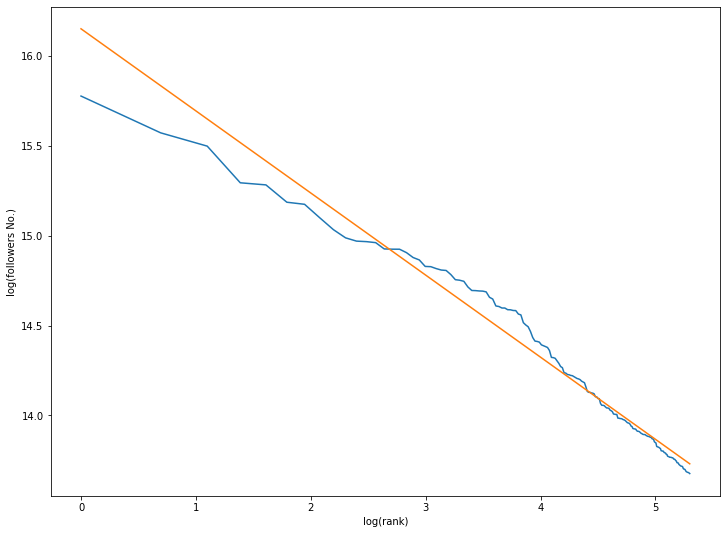

In [10]:
plt.figure(figsize=(12, 9))
plt.plot(np.log(rank_jp_arr), np.log(followers_jp_arr))
plt.plot(np.log(rank_jp_arr), model_jp.predict(np.log(rank_jp_arr).reshape(-1,1)))

plt.ylabel('log(followers No.)')
plt.xlabel('log(rank)')

世界の場合

In [12]:
# ついでに線形モデルでフィットする
followers_all_arr = followers_all_df['フォロワー数'].to_numpy()
rank_all_arr = np.arange(followers_all_arr.shape[0]) + 1

model_all = lr_all.fit(np.log(rank_all_arr).reshape(-1, 1), np.log(followers_all_arr))
print(model_all.coef_, model_all.intercept_)

[-0.52764815] 19.209526323152097


Text(0.5, 0, 'log(rank)')

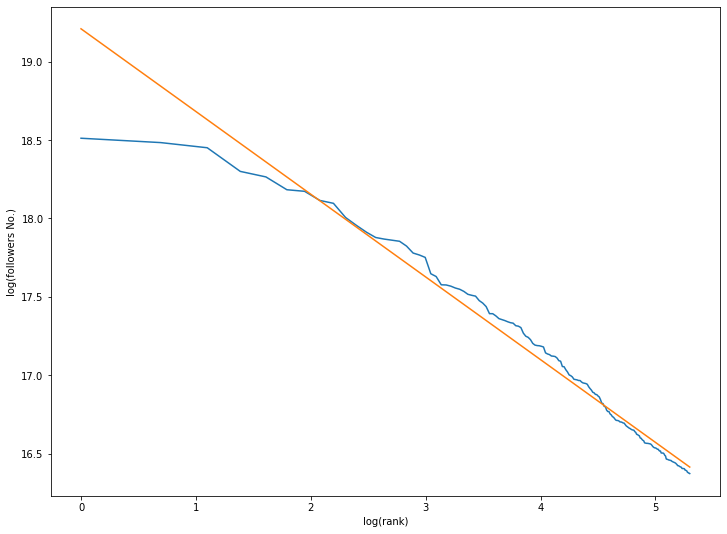

In [14]:
plt.figure(figsize=(12, 9))
plt.plot(np.log(rank_all_arr), np.log(followers_all_arr))
plt.plot(np.log(rank_all_arr), model_all.predict(np.log(rank_all_arr).reshape(-1,1)))

plt.ylabel('log(followers No.)')
plt.xlabel('log(rank)')

どちらも概ね直線上に載った感じです。
おおよそ

$$
\log{(followers)}
= b - a \log{(rank)} 
$$

みたいな感じなので、

$$
followers = sim C * rank^{-a}
$$

となります。
大雑把にいうと人間社会で注目はかなり一部の人間に集中している、という話です。

係数に関してですが、日本の場合

$$
C = e^{16} \\
a = 0.46
$$

世界の場合

$$
C = e^{19} \\
a = 0.53
$$

となります。$C$の値はおおよそそれぞれのケースの一番多い人のフォロワー数になっています

In [30]:
np.exp(model_jp.intercept_), followers_jp_arr[0], np.exp(model_all.intercept_), followers_all_arr[0]

(10320692.926087316, 7100674, 220085424.72447222, 109501564)

しかし、日本の場合、1億人目の推定フォロワー数を求めると

In [26]:
rank = 1 * 10 ** 8
np.exp(model_jp.predict(np.log([[rank]])))

array([2300.06504938])

2千人ぐらいとなっていて、明らかに現実と異なります。超フォロワー富裕層である有名人とフォロワー貧困層である一般人の間のどこかに何らかのメカニズムで修正が入るでしょう。

ついでに世界の場合、100億人目のフォロワー数は

In [27]:
rank = 50*10**8
np.exp(model_all.predict(np.log([[rank]])))

array([1678.60178686])

と千5百人程度でした。

# 考察

zipf則の形成理由は「富めるがさらに富める」ことだそうです。

大量のフォロワーを集めるためにおそらく大量の資本によるプロヂュースが行われていることを考えれば、
ランキングトップ層でのジップ則がおそらく資本によるもので、ビジネス由来の要素が大きいと考えられます。
それが一般人となると影響がなくなってくると推測しています。
しかし資本が介在しなくても資本とは別の理由のジップ則が現れそうだと考えると、
フォロワー数が減少していくと、どこかでジップ則の係数が遷移するところが見えるのではないかと予想しています。

# 感想

前向きなソリューションが出てきた気がする。
詳細は企業ヒ・ミ・ツ。
やっぱ、EDAは重要。

データはトモダチだぁ〜